Data Collection
===================

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/twitter_training.csv"
df=pd.read_csv(url, header=None)
print(df.head())

      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
#Replace with actual column names
column_names = ['id', 'game', 'target', 'sentiment']

#Assign column names to the DataFrame
df.columns = column_names

#Display the DataFrame with updated column names
print(df.head())

     id         game    target  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                           sentiment  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


Data Cleaning
===============

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   game       74682 non-null  object
 2   target     74682 non-null  object
 3   sentiment  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df = df[df['sentiment'].notna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         73996 non-null  int64 
 1   game       73996 non-null  object
 2   target     73996 non-null  object
 3   sentiment  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [ ]:
df['target'].value_counts() #count the number of each values in target column

,count
target,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


In [ ]:
mappings = {'Irrelevant': 'Neutral'}
df['target'] = df['target'].replace(mappings)  #replacing the value irrelevant to neutral

In [ ]:
df['target'].value_counts()

,count
target,
Neutral,30983
Negative,22358
Positive,20655


In [ ]:
df.drop(columns=["id","game"],inplace=True)  #drop the id and game column

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 19.0 MB/s eta 0:00:00


In [ ]:
df['sentiment']=df['sentiment'].str.lower()  #converting the text to lower
df.head()

,target,sentiment
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
#removing the extra white space
def remove_whitespace(text):
    return  " ".join(text.split())


df['sentiment']=df['sentiment'].apply(remove_whitespace)
df.head()

,target,sentiment
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize
df['sentiment']=df['sentiment'].apply(lambda X: word_tokenize(X))  #using the tokenizer, tokenize the words
df.head()

,target,sentiment
0,Positive,"[im, getting, on, borderlands, and, i, will, m..."
1,Positive,"[i, am, coming, to, the, borders, and, i, will..."
2,Positive,"[im, getting, on, borderlands, and, i, will, k..."
3,Positive,"[im, coming, on, borderlands, and, i, will, mu..."
4,Positive,"[im, getting, on, borderlands, 2, and, i, will..."


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#removing stopwords
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)

    return result

df['sentiment']=df['sentiment'].apply(remove_stopwords)
df.head()

,target,sentiment
0,Positive,"[im, getting, borderlands, murder, ,]"
1,Positive,"[coming, borders, kill, ,]"
2,Positive,"[im, getting, borderlands, kill, ,]"
3,Positive,"[im, coming, borderlands, murder, ,]"
4,Positive,"[im, getting, borderlands, 2, murder, ,]"


In [ ]:
#removing punctuation
from nltk.tokenize import RegexpTokenizer
def remove_punct(text):
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

df['sentiment']=df['sentiment'].apply(remove_punct)
df.head()

,target,sentiment
0,Positive,"[im, getting, borderlands, murder]"
1,Positive,"[coming, borders, kill]"
2,Positive,"[im, getting, borderlands, kill]"
3,Positive,"[im, coming, borderlands, murder]"
4,Positive,"[im, getting, borderlands, 2, murder]"


In [ ]:
#removing numerical values in sentiment column
def keep_alphabetical_only(sentiment_list):
    return [word for word in sentiment_list if word.isalpha()]

df['sentiment'] = df['sentiment'].apply(keep_alphabetical_only)
df.head()

,target,sentiment
0,Positive,"[im, getting, borderlands, murder]"
1,Positive,"[coming, borders, kill]"
2,Positive,"[im, getting, borderlands, kill]"
3,Positive,"[im, coming, borderlands, murder]"
4,Positive,"[im, getting, borderlands, murder]"


In [ ]:
#remiving im word in sentiment column
def remove_im(sentiment_list):
    return [word for word in sentiment_list if word != 'im']

df['sentiment'] = df['sentiment'].apply(remove_im)
df.head()

,target,sentiment
0,Positive,"[getting, borderlands, murder]"
1,Positive,"[coming, borders, kill]"
2,Positive,"[getting, borderlands, kill]"
3,Positive,"[coming, borderlands, murder]"
4,Positive,"[getting, borderlands, murder]"


In [ ]:
#Convert lists to tuples in the 'sentiment' column
df['sentiment'] = df['sentiment'].apply(tuple)

In [ ]:
#Drop duplicates
df = df.drop_duplicates()

In [ ]:
#Convert tuples back to lists (if necessary)
df['sentiment'] = df['sentiment'].apply(list)

In [ ]:
df.shape

(61095, 2)

In [ ]:
#remiving single letter words
def remove_single_letters(text):
    return [word for word in text if len(word) > 1]

df['sentiment'] = df['sentiment'].apply(remove_single_letters)

In [ ]:
df.head()

,target,sentiment
0,Positive,"[getting, borderlands, murder]"
1,Positive,"[coming, borders, kill]"
2,Positive,"[getting, borderlands, kill]"
3,Positive,"[coming, borderlands, murder]"
6,Positive,"[spent, hours, making, something, fun, know, h..."


In [ ]:
df["len_sent"] = df['sentiment'].apply(lambda X: len(X)) #count the words in sentiment column and stored in a new column
df.head()

,target,sentiment,len_sent
0,Positive,"[getting, borderlands, murder]",3
1,Positive,"[coming, borders, kill]",3
2,Positive,"[getting, borderlands, kill]",3
3,Positive,"[coming, borderlands, murder]",3
6,Positive,"[spent, hours, making, something, fun, know, h...",26


In [ ]:
df = df[df['len_sent'] != 0]
df.shape

(61074, 3)

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(text):
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()

        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
        result.append(wordnet.lemmatize(token,pos))
    return result

df['sentiment']=df['sentiment'].apply(lemmatization)
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,target,sentiment,len_sent
0,Positive,"[get, borderland, murder]",3
1,Positive,"[come, border, kill]",3
2,Positive,"[get, borderland, kill]",3
3,Positive,"[come, borderland, murder]",3
6,Positive,"[spent, hour, make, something, fun, know, huge...",26


In [ ]:
df.drop(columns=["len_sent"],inplace=True)

In [ ]:
df.head()

,target,sentiment
0,Positive,"[get, borderland, murder]"
1,Positive,"[come, border, kill]"
2,Positive,"[get, borderland, kill]"
3,Positive,"[come, borderland, murder]"
6,Positive,"[spent, hour, make, something, fun, know, huge..."


In [ ]:
df['sentiment_joined'] = df['sentiment'].apply(lambda x: ' '.join(x))
df.head()

,target,sentiment,sentiment_joined
0,Positive,"[get, borderland, murder]",get borderland murder
1,Positive,"[come, border, kill]",come border kill
2,Positive,"[get, borderland, kill]",get borderland kill
3,Positive,"[come, borderland, murder]",come borderland murder
6,Positive,"[spent, hour, make, something, fun, know, huge...",spent hour make something fun know huge border...


Data Analysis
=============

In [ ]:
df.head()

,target,sentiment,sentiment_joined
0,Positive,"[get, borderland, murder]",get borderland murder
1,Positive,"[come, border, kill]",come border kill
2,Positive,"[get, borderland, kill]",get borderland kill
3,Positive,"[come, borderland, murder]",come borderland murder
6,Positive,"[spent, hour, make, something, fun, know, huge...",spent hour make something fun know huge border...


In [ ]:
df['target'].value_counts()

,count
target,
Neutral,26021
Negative,18701
Positive,16352


In [ ]:
#Add a text length column
df['text_length'] = df['sentiment_joined'].apply(len)

#Display the text length statistics
print(df['text_length'].describe())

count    61074.000000
mean        74.312572
std         49.196142
min          1.000000
25%         36.000000
50%         64.000000
75%        102.000000
max        796.000000
Name: text_length, dtype: float64


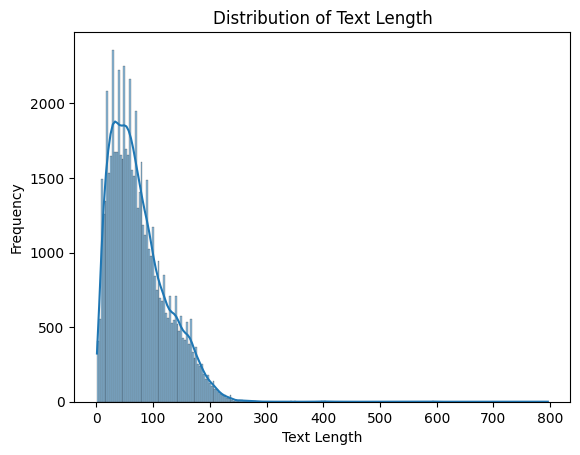

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualize the text length distribution
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
!pip install wordcloud

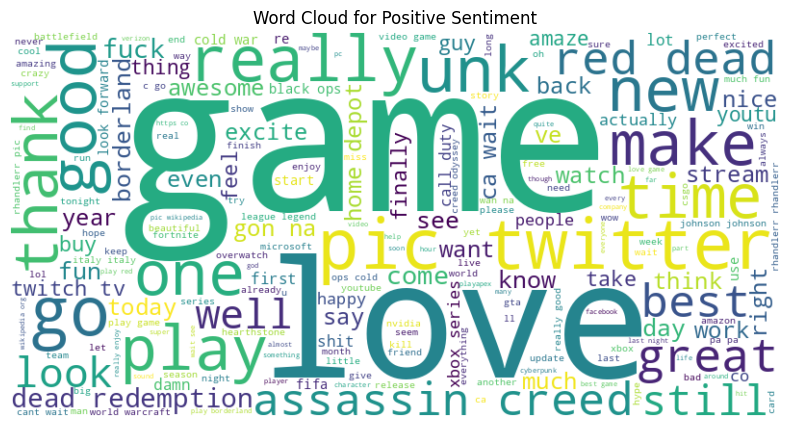

In [ ]:
from wordcloud import WordCloud

#Combine all text for positive sentiment
positive_texts = ' '.join(df[df['target'] == 'Positive']['sentiment_joined'])

#Generate word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)

#Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()


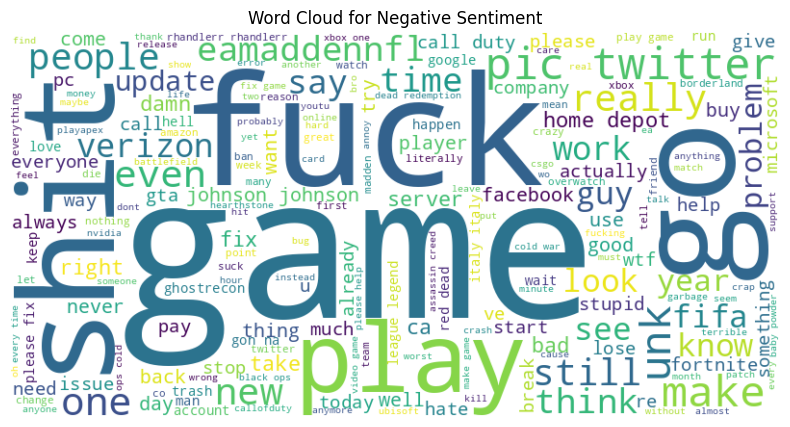

In [ ]:
from wordcloud import WordCloud

#Combine all text for Negative sentiment
negative_texts = ' '.join(df[df['target'] == 'Negative']['sentiment_joined'])

#Generate word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)

#Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()


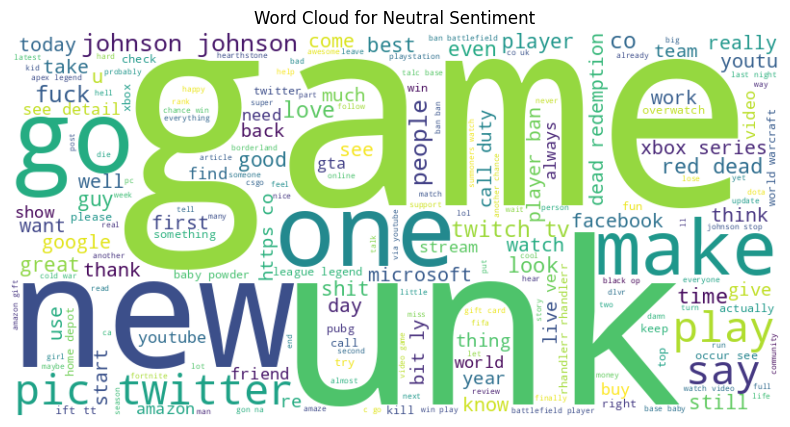

In [ ]:
from wordcloud import WordCloud

#Combine all text for positive sentiment
neutral_texts = ' '.join(df[df['target'] == 'Neutral']['sentiment_joined'])

#Generate word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(neutral_texts)

#Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment')
plt.show()


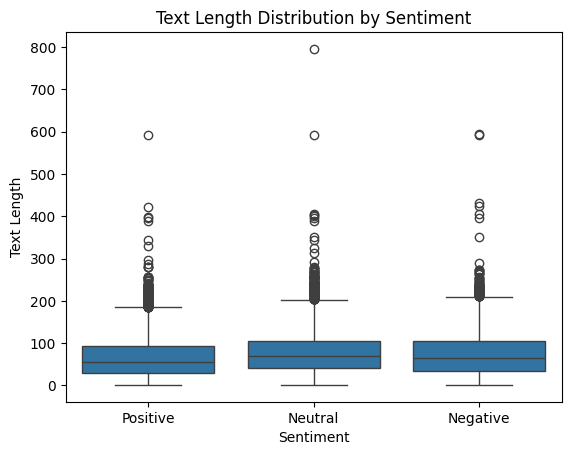

In [ ]:
#Boxplot of text length by sentiment
sns.boxplot(x='target', y='text_length', data=df)
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()


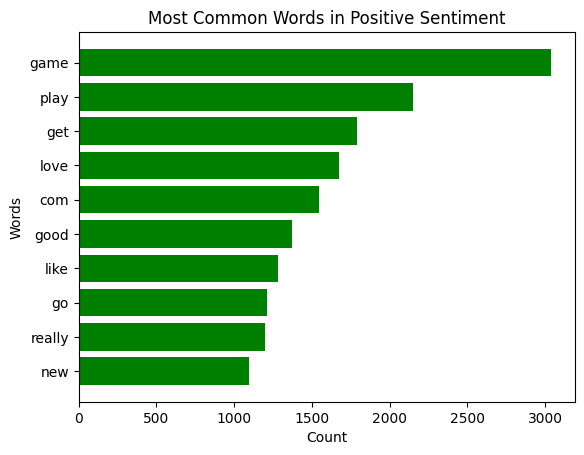

In [ ]:
from collections import Counter
from nltk.corpus import stopwords

#Function to get most common words
def get_most_common_words(text, n=10):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  #keep only alphabetic words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  #remove stopwords
    return Counter(tokens).most_common(n)

#Combine text by sentiment
positive_text = ' '.join(df[df['target'] == 'Positive']['sentiment_joined'])

#Get most common words
common_words_pos = get_most_common_words(positive_text, 10)

#Plot most common words for positive sentiment
words, counts = zip(*common_words_pos)
plt.barh(words, counts, color='green')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Most Common Words in Positive Sentiment')
plt.gca().invert_yaxis()
plt.show()


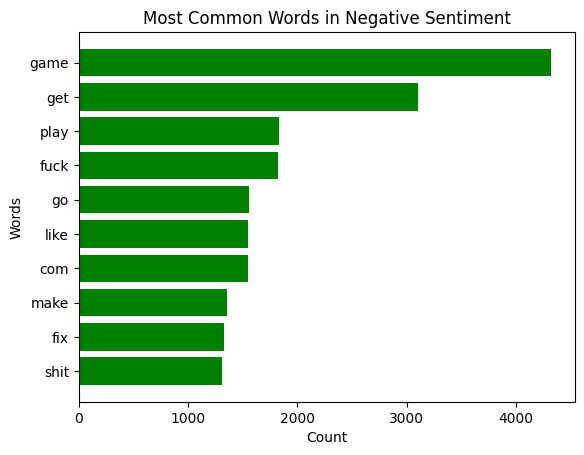

In [ ]:
from collections import Counter
from nltk.corpus import stopwords

#Function to get most common words
def get_most_common_words(text, n=10):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  #keep only alphabetic words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  #remove stopwords
    return Counter(tokens).most_common(n)

#Combine text by sentiment
negative_text = ' '.join(df[df['target'] == 'Negative']['sentiment_joined'])

#Get most common words
common_words_pos = get_most_common_words(negative_text, 10)

#Plot most common words for positive sentiment
words, counts = zip(*common_words_pos)
plt.barh(words, counts, color='green')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Most Common Words in Negative Sentiment')
plt.gca().invert_yaxis()
plt.show()


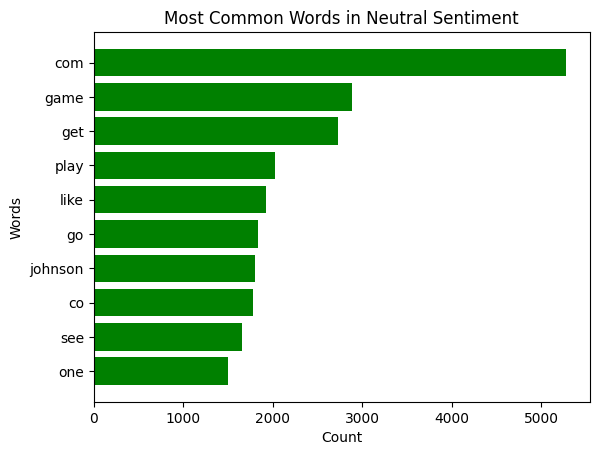

In [ ]:
from collections import Counter
from nltk.corpus import stopwords

#Function to get most common words
def get_most_common_words(text, n=10):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  #keep only alphabetic words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  #remove stopwords
    return Counter(tokens).most_common(n)

#Combine text by sentiment
neutral_text = ' '.join(df[df['target'] == 'Neutral']['sentiment_joined'])

#Get most common words
common_words_pos = get_most_common_words(neutral_text, 10)

#Plot most common words for positive sentiment
words, counts = zip(*common_words_pos)
plt.barh(words, counts, color='green')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Most Common Words in Neutral Sentiment')
plt.gca().invert_yaxis()
plt.show()


Model Training
==============

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentiment_joined'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Convert target column to numerical values
le = LabelEncoder()
y = le.fit_transform(df['target'])

In [ ]:
#Get the mapping of original values to encoded values
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [ ]:
mapping

{'Negative': 0, 'Neutral': 1, 'Positive': 2}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
logic_reg = LogisticRegression()

#Train the Logistic regressor
logic_reg.fit(X_train, y_train)

#Predict on the test set
y_pred = logic_reg.predict(X_test)

y_pred_train = logic_reg.predict(X_train)

r2_test = accuracy_score(y_test, y_pred)

r2_train = accuracy_score(y_train, y_pred_train)
print(r2_test,r2_train)

0.7884568153909128 0.8570580650443111


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Rand_fore_reg = RandomForestClassifier()

#Train the Random forest Regressor
Rand_fore_reg.fit(X_train, y_train)

#Predict on the test set
y_pred = Rand_fore_reg.predict(X_test)

y_pred_train = Rand_fore_reg.predict(X_train)

r2_test = accuracy_score(y_test, y_pred)

r2_train = accuracy_score(y_train, y_pred_train)
print(r2_test,r2_train)

0.913548915268113 0.9964182648027999


In [ ]:
Deci_tree_reg = DecisionTreeClassifier()

#Train the Decision Tree Classifier
Deci_tree_reg.fit(X_train, y_train)

#Predict on the test set
y_pred = Deci_tree_reg.predict(X_test)

y_pred_train = Deci_tree_reg.predict(X_train)

r2_test = accuracy_score(y_test, y_pred)

r2_train = accuracy_score(y_train, y_pred_train)
print(r2_test,r2_train)

0.7918133442488743 0.9964182648027999


In [ ]:
KNN_class = KNeighborsClassifier()

#Train the Decision Tree Classifier
KNN_class.fit(X_train, y_train)

#Predict on the test set
y_pred = KNN_class.predict(X_test)

y_pred_train = KNN_class.predict(X_train)

r2_test = accuracy_score(y_test, y_pred)

r2_train = accuracy_score(y_train, y_pred_train)
print(r2_test,r2_train)

0.9160049119934507 0.9623406127837246


In [ ]:
pd.Series(y_train).value_counts()

,count
1,20817
0,14961
2,13081


In [ ]:
a = "I am soft hearted person"
a = a.lower()
a = " ".join(a.split())
a = word_tokenize(a)
a = remove_stopwords(a)
a = remove_punct(a)
a = keep_alphabetical_only(a)
a = remove_single_letters(a)
a = lemmatization(a)
a = " ".join(a)
a

'soft hearted person'

In [ ]:
aa_transformed = vectorizer.transform([a])

#Predict the sentiment using the loaded model
y_pred = Rand_fore_reg.predict(aa_transformed)
print(y_pred)
print(le.inverse_transform(y_pred))

[1]
['Neutral']
